In [92]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
pd.set_option('display.max_rows', 10)

In [365]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Week', 'Total ILI']]
df_hospital = df_hospital[28:256]
df_hospital = df_hospital.reset_index(drop=True)
df_hospital

,Week,Total ILI
0,15-2015,12311
1,16-2015,11021
2,17-2015,11311
3,18-2015,10946
4,19-2015,9891
...,...,...
223,30-2019,7755
224,31-2019,7851
225,32-2019,8031
226,33-2019,8933


In [366]:
df_twitter = pd.read_csv('../data/twitter-flu-data.csv', header=None)
df_twitter.columns = ['Year', 'Week', '1', '2', '3', '4', '5', '6', '7']
df_twitter['Week'] = df_twitter.Week.map(str) + "-" + df_twitter.Year.map(str)
df_twitter['Tweets'] = df_twitter[['1', '2', '3', '4', '5', '6', '7']].sum(axis=1)
df_twitter = df_twitter[['Week', 'Tweets']][27:-1]
df_twitter = df_twitter.reset_index(drop=True)
df_twitter

,Week,Tweets
0,15-2015,429
1,16-2015,386
2,17-2015,352
3,18-2015,387
4,19-2015,450
...,...,...
223,30-2019,367
224,31-2019,321
225,32-2019,354
226,33-2019,292


In [367]:
df_us = pd.read_csv('../data/USA_flu_virus_counts.csv')
df_us['Week'] = df_us.Week.map(str) + "-" + df_us.Year.map(str)
df_us = df_us[['Week', 'ALL_INF']]
df_us = df_us[786+27:1042]
df_us = df_us.drop(851)
df_us = df_us.reset_index(drop=True)
df_us

,Week,ALL_INF
0,15-2015,1472
1,16-2015,1127
2,17-2015,772
3,18-2015,609
4,19-2015,527
...,...,...
223,30-2019,253
224,31-2019,248
225,32-2019,222
226,33-2019,265


In [368]:
df_aus = pd.read_csv('../data/AUS_flu_virus_counts.csv')
df_aus['Week'] = df_aus.Week.map(str) + "-" + df_aus.Year.map(str)
df_aus = df_aus[['Week', 'ALL_INF']]
df_aus = df_aus[912:1168-27]
df_aus = df_aus.drop(977)
df_aus = df_aus.reset_index(drop=True)
df_aus

,Week,ALL_INF
0,40-2014,72
1,41-2014,58
2,42-2014,29
3,43-2014,28
4,44-2014,24
...,...,...
223,3-2019,125
224,4-2019,97
225,5-2019,110
226,6-2019,106


In [376]:
list_hospital = list(df_hospital['Total ILI'])
list_tweets = list(df_twitter['Tweets'])
list_us = list(df_us['ALL_INF'])
list_aus = list(df_aus['ALL_INF'])

# list_tweets = [i / 5000 for i in list_tweets]
# list_hospital = [i / 50 for i in list_hospital]
# list_us = [i / 20 for i in list_us]

list_hospital_norm = [float(i)/sum(list_hospital) for i in list_hospital]
list_tweets = [float(i)/sum(list_tweets) for i in list_tweets]
list_us = [float(i)/sum(list_us) for i in list_us]
list_aus = [float(i)/sum(list_aus) for i in list_aus]

In [370]:
# list_hospital_real = list_hospital[:-52]
# list_tweets_real = list_tweets[:-52]
# list_us_real = list_us[:-52]
# list_aus_real = list_aus[:-52]

# list_hospital_pred = list_hospital[-52:]
# list_tweets_pred = list_tweets[-52:]
# list_us_pred = list_tweets[-52:]
# list_aus_pred = list_aus[-52:]

list_hospital_real = list_hospital[:-104]
list_tweets_real = list_tweets[:-104]
list_us_real = list_us[:-104]
list_aus_real = list_aus[:-104]

list_hospital_pred = list_hospital[-104:]
list_tweets_pred = list_tweets[-104:]
list_us_pred = list_tweets[-104:]
list_aus_pred = list_aus[-104:]

In [371]:
features = [list_tweets_real, list_us_real, list_aus_real]
pred = [list_tweets_pred, list_us_pred, list_aus_pred]

In [372]:
features = list(map(list, zip(*features)))
pred = list(map(list, zip(*pred)))

In [378]:
print(len(pred))
print(len(pred[0]))

104
3


In [373]:
model = SARIMAX(list_hospital_real, exog=features, order=(1, 1, 1), seasonal_order=(1, 1, 0, 52))
model_fit = model.fit()

In [379]:
# make prediction
future = 104
predictions = model_fit.predict(len(list_hospital_real), len(list_hospital_real) + future - 1, exog=pred)
print(predictions)
future_weeks = list(range(len(list_hospital_real), len(list_hospital_real) + future))
# future_weeks

[10211.42063941 12470.19513364 12388.08738087 13593.98834377
 11909.07993191 17147.43494225 16700.94997712 17442.9950238
 20066.89410519 21268.12188673 21823.39654225 22887.58922994
 21408.78561551 24254.38536433 24354.26780151 24577.98147731
 24795.48183347 23843.96210429 24910.46844482 22718.50711809
 24816.12382317 24251.55794574 24656.44848319 28637.82101718
 23525.70130893 23704.68868101 21850.26679018 23843.82392163
 20318.21152363 20739.8404406  20385.05325321 18850.26495089
 15534.67105927 15135.49719438 14610.08491311 14260.91704624
 16142.557254   16442.51372885 15558.94807647 13631.47277773
 12571.47074281 12848.57027179 12939.8964851  10334.31718878
 10425.62149947 10403.26282566 10927.18806661 11627.30220006
 11971.39519363  9960.23847337 10480.3648721  11976.18225906
 12070.85801764 12917.16550192 12625.79517658 13756.52436914
 12736.16126828 16212.26183556 16462.97630201 17485.60983625
 17953.38813188 18213.23828656 18974.41594072 20272.22562073
 19044.08449031 21598.792

In [380]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI + Features: 2014 - 2019')

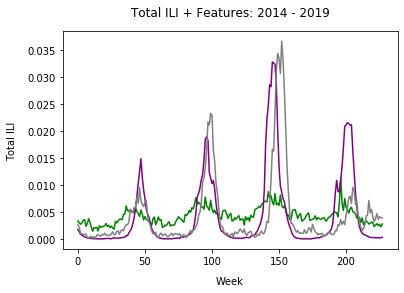

In [381]:
# plt.plot(list_hospital, c='blue')
plt.plot(list_tweets, c='green')
plt.plot(list_us, c='purple')
plt.plot(list_aus, c='gray')
# plt.plot(predictions_df, '--', c='#1f77b4')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI + Features: 2014 - 2019", pad=15)

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

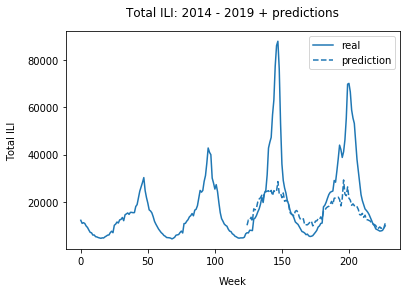

In [382]:
plt.plot(df_hospital['Total ILI'], label='real')
# plt.plot(predictions_df)
plt.plot(predictions_df, '--', c='#1f77b4', label='prediction')
plt.legend()
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [ ]:
model_fit.summary()